#حسین سیفی
#810100386

#Prerquistites

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier


In [ ]:
def score(y, pred, model):
  f1 = f1_score(y, pred, average="macro")
  p = precision_score(y, pred, average="macro")
  r = recall_score(y, pred, average="macro")
  cm = confusion_matrix(y, pred, labels=model.classes_)
  print("Precision: " + str(round(p,3)))
  print("Recall: " + str(round(r,3)))
  print("F1-Score: " + str(round(f1,3)))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
def plot_borders(model, X):
  fig, ax = plt.subplots()
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)
  plot_contours(ax, model, xx, yy, cmap=plt.cm.cool)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='black')
  ax.legend()
  plt.show()

In [ ]:
df = load_iris()

#Part 1

In [ ]:
X = df.data[:,:2]
y = df.target

In [ ]:
svmmodel = SVC(kernel='linear').fit(X,y)

Precision: 0.821
Recall: 0.82
F1-Score: 0.82


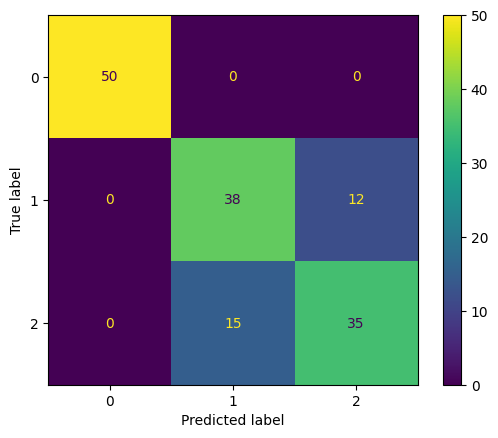

In [ ]:
pred = svmmodel.predict(X)
score(y, pred, svmmodel)

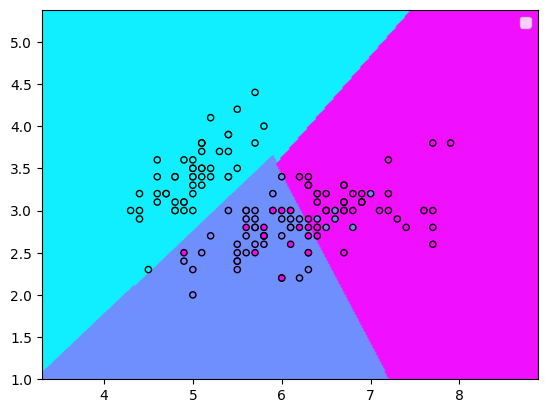

In [ ]:
plot_borders(svmmodel, X)

#Part 2

In [ ]:
X = df.data[:,2:]
y = df.target

In [ ]:
svmmodel = SVC(kernel='linear').fit(X,y)

Precision: 0.967
Recall: 0.967
F1-Score: 0.967


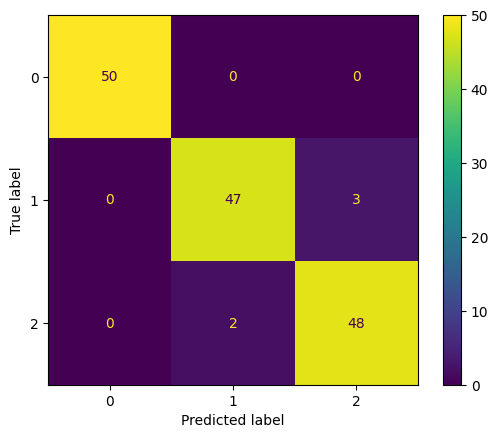

In [ ]:
pred = svmmodel.predict(X)
score(y, pred, svmmodel)

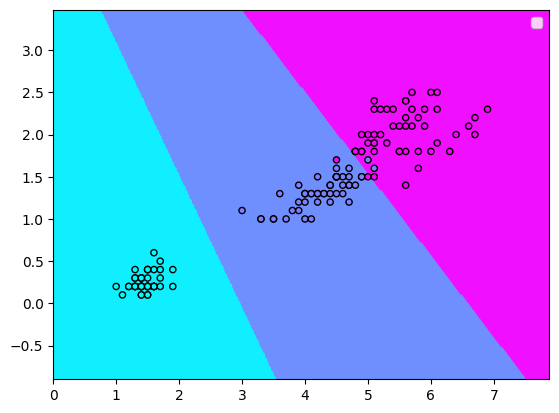

In [ ]:
plot_borders(svmmodel, X)

#Part 3

In [ ]:
X = df.data[:,2:]
y = df.target

Kernel: linear
Precision: 0.967
Recall: 0.967
F1-Score: 0.967


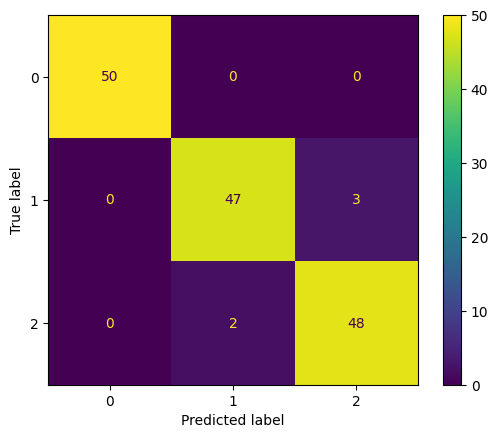

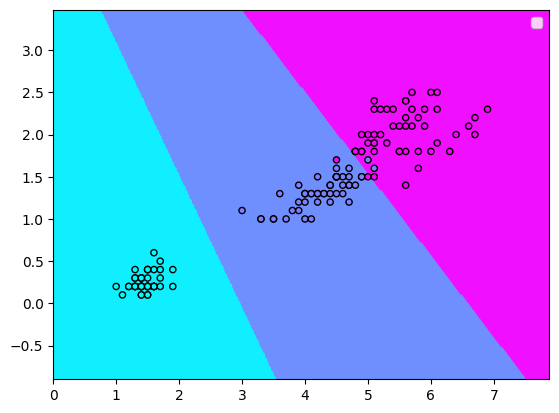

Kernel: rbf
Precision: 0.954
Recall: 0.953
F1-Score: 0.953


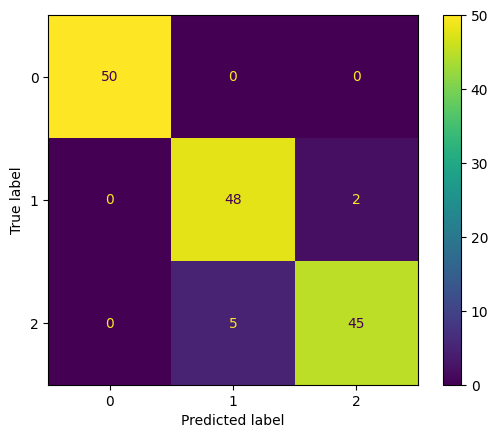

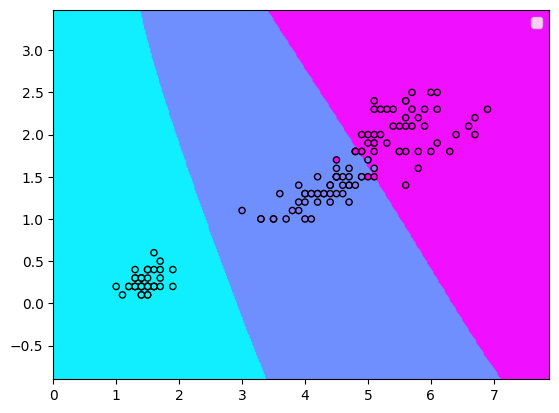

Kernel: poly
Precision: 0.967
Recall: 0.967
F1-Score: 0.967


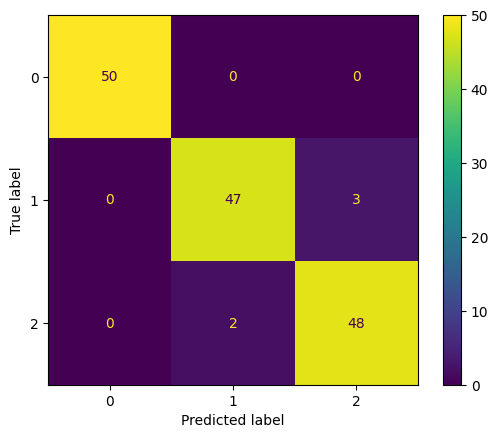

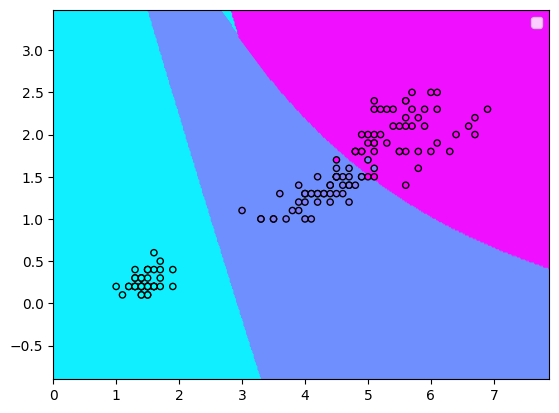

In [ ]:
for k in ['linear', 'rbf', 'poly']:
  print("Kernel: " + k)
  model = SVC(kernel=k).fit(X,y)
  pred = model.predict(X)
  score(y, pred, model)
  plot_borders(model, X)

#Part 4

In [ ]:
X = df.data
y = df.target

c= 0.25
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
c= 0.5
Precision: 0.96
Recall: 0.96
F1-Score: 0.96
c= 0.75
Precision: 0.973
Recall: 0.973
F1-Score: 0.973


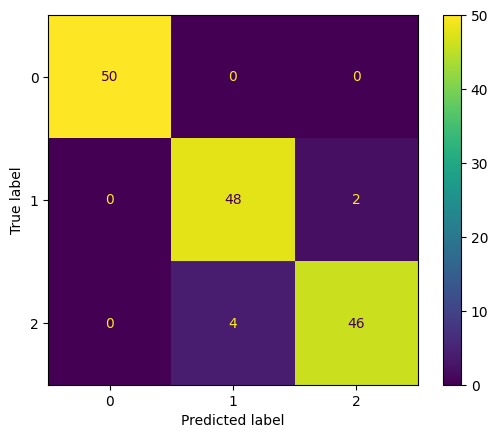

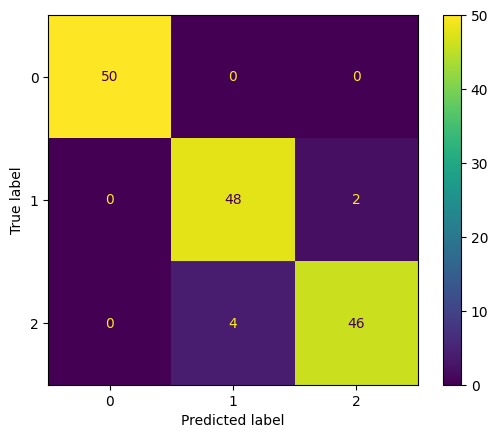

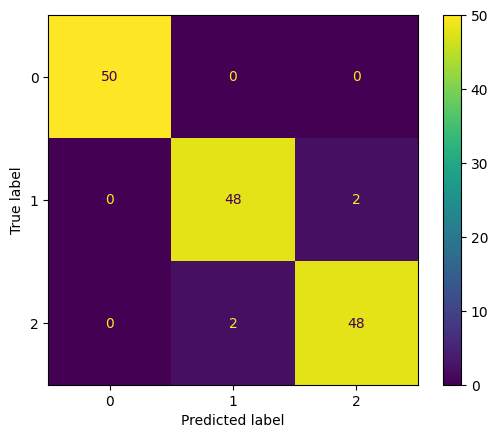

In [ ]:
for c in [0.25, 0.5 , 0.75]:
  print("c= " + str(c))
  model = SVC(C=c).fit(X,y)
  pred = model.predict(X)
  score(y, pred, model)

Gamma= 0.1
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Gamma= 0.2
Precision: 0.987
Recall: 0.987
F1-Score: 0.987
Gamma= 0.3
Precision: 0.981
Recall: 0.98
F1-Score: 0.98


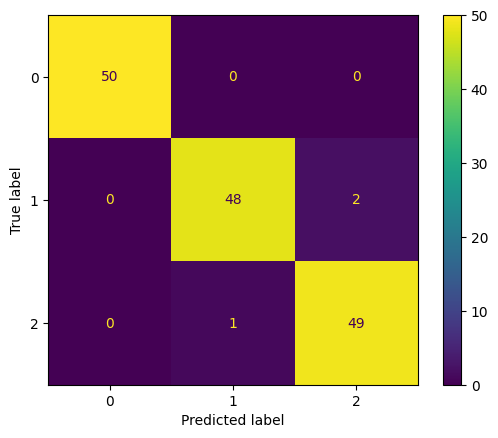

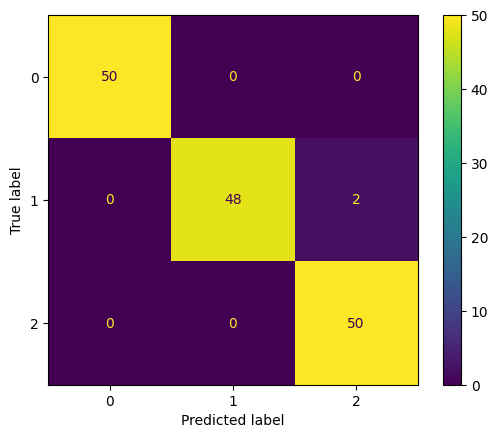

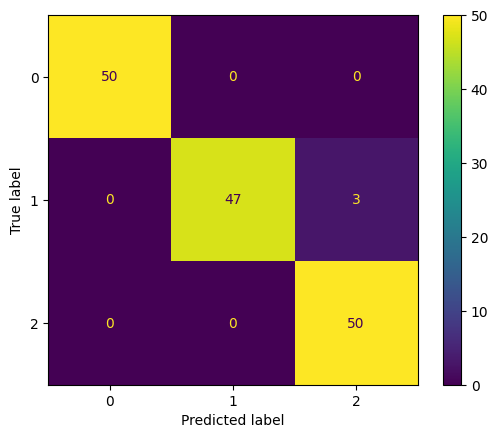

In [ ]:
for g in [0.1, 0.2 , 0.3]:
  print("Gamma= " + str(g))
  model = SVC(gamma=g).fit(X,y)
  pred = model.predict(X)
  score(y, pred, model)

#Part 5

In [ ]:
X = df.data[:,2:]
y = df.target

Precision: 0.96
Recall: 0.96
F1-Score: 0.96


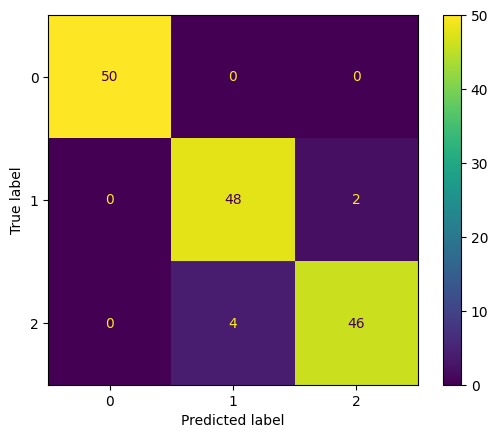

In [ ]:
params = {'kernel':('linear', 'rbf', 'poly'), 'C':(0.001, 0.01, 0.1, 1, 10, 100), 'gamma':(0.001, 0.01, 0.1, 1, 10, 100)}
model = GridSearchCV(SVC(), params).fit(X,y)
pred = model.predict(X)
score(y, pred, model) 

In [ ]:
model.best_estimator_

SVC(C=0.001, gamma=0.001, kernel='linear')

#Part 6

In [ ]:
X = df.data
y = df.target

Kernel: linear
Precision: 0.962
Recall: 0.96
F1-Score: 0.96
Kernel: poly
Precision: 0.981
Recall: 0.98
F1-Score: 0.98
Kernel: rbf
Precision: 0.954
Recall: 0.953
F1-Score: 0.953


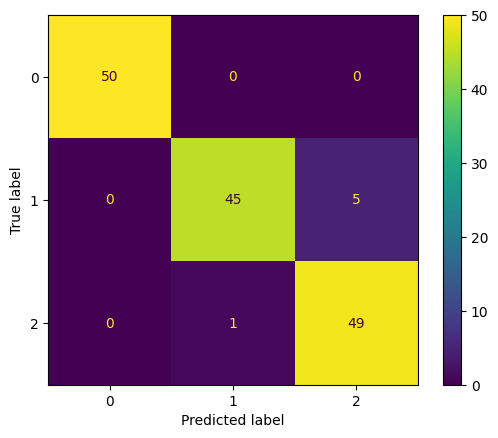

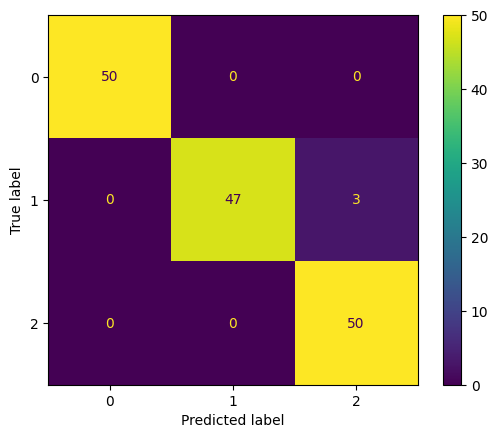

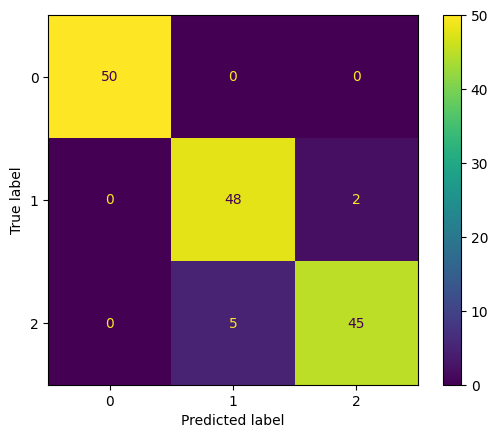

In [ ]:
for k in ['linear', 'poly', 'rbf']:
  print("Kernel: " + k)
  model = OneVsRestClassifier(SVC(kernel=k)).fit(X,y)
  pred = model.predict(X)
  score(y, pred, model) 

Kernel: linear
Precision: 0.993
Recall: 0.993
F1-Score: 0.993
Kernel: poly
Precision: 0.987
Recall: 0.987
F1-Score: 0.987
Kernel: rbf
Precision: 0.973
Recall: 0.973
F1-Score: 0.973


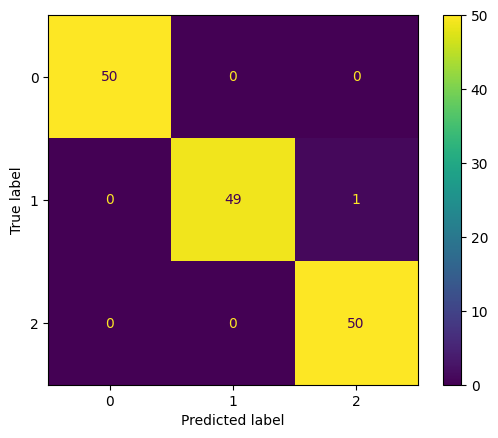

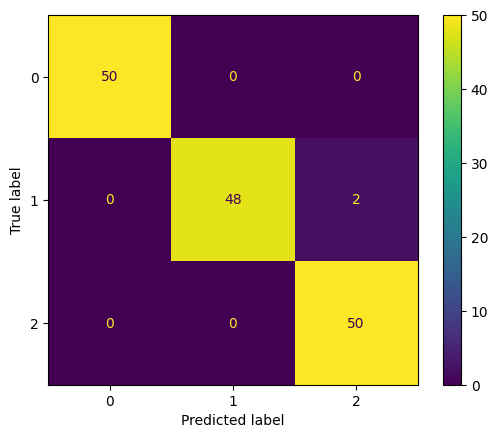

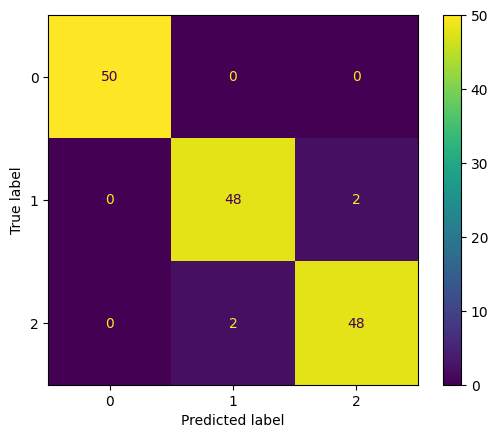

In [ ]:
for k in ['linear', 'poly', 'rbf']:
  print("Kernel: " + k)
  model = OneVsOneClassifier(SVC(kernel=k)).fit(X,y)
  pred = model.predict(X)
  score(y, pred, model) 